# Lesson 6 Assignment - Advertising Sales Regression

## Author - Logan Downing
Datasci 410  
May 10, 2018  
v.1.2



Mr. Robert Harris  
Harris Communications  
1100 Dexter Ave N  
Seattle, WA 98109  

Re: Status of current Harris Communications advertising spend

Dear Mr. Harris,  

Thank you for your recent inquiry on the status of the Harris Communications advertising budget. We are happy to provide the most recent accounting your advertising spend dollars, and your investment's level of sales.  

As you know, Harris Communications divides its advertising budget into three media channels:

* TV
* Radio
* Newspaper

We have researched your advertising spends among these three channels. Coupling these data with the total sales over the last year, we can get a good sense of which channel or channels are performing best.

In this report we present the results of this analysis.

In **Part 1**, we look at the spends in each channel and how they compare to total sales. In this part we only look at trends, to give you a sense of the importance of each channel to  sales.

In **Part 2**, we provide analytical examinations of the effects of the advertising spend for each channel. Using these data, Harris Communications will be able to decide how to allocate its future spend among channels.

Included with our running narrative are some technical details that your quant division may be interested in reviewing. Please let us know if there's any additional data you need in this regard.

Thank for being our client. We value our relationship, and look forward to serving Harris Communications for many years to come.

Cordially,

Logan Downing  
Logan Technical Services  
Seattle, WA 98102

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as sm

In [2]:
# Load data
filename = 'Advertising.csv'
#filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
df = pd.read_csv(filename, index_col=0)
#print(df.head())
#print(df.shape)
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

# Part 1 - High-level overview of each channel
In this section we take a very broad look at the spend in each channel: TV, radio and newspaper. We'll look at some metrics and charts that suggest the relative performance of each channel. It's important to note that these data are a high-level view, and **should not be used to make financial decisions** (see Part 2 for analysis that will support decision-making).

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 10 May 2018   Prob (F-statistic):           1.47e-42
Time:                        14:14:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

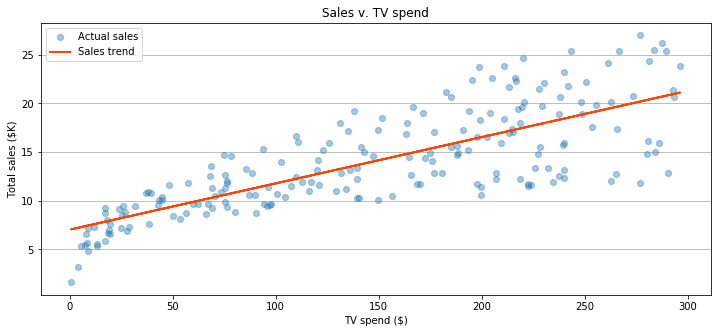

Sales given $0 TV spend: $7032.59 (y-intercept)
Sales per $1 of TV spend: $47.54 (slope)
Strength of fit: 61.19% (R2, adjusted=60.99%)


In [3]:
# define a function to do the regression plots for trends
def trendline(df,feature):
    ## pass in the full dataframe
    ## pass in the feature name (e.g., 'TV','newspaper', or 'radio')

    model = sm.ols(formula='sales ~ '+feature,data=df)
    results = model.fit()
    sales_pred = results.predict(df)
    
    print(results.summary())

    plt.figure(figsize=(12,5))

    plt.plot(df[feature],df.sales,'bo',alpha=.4,label="Actual sales",color='C0')
    plt.title("Sales v. " + feature + " spend")
    plt.xlabel(feature + " spend ($)")
    plt.ylabel("Total sales ($K)")

    plt.plot(df[feature],sales_pred,color='orangered',linewidth=2,label="Sales trend")
    plt.grid(True,axis='y')
    plt.legend()
    plt.show()

    # and print out a few statistics that we'll interpret for the client
    print("Sales given $0 {0} spend: ${1:.2f} (y-intercept)".format(feature,results.params.Intercept*1000))
    print("Sales per $1 of {0} spend: ${1:.2f} (slope)".format(feature,results.params[feature]*1000))
    print("Strength of fit: {0:.2f}% (R2, adjusted={1:.2f}%)".format(results.rsquared*100,results.rsquared_adj*100))

trendline(df,'TV')

## Channel: TV
The chart above shows the relationship between advertising spend for TV and total sales. It's critical to note that these results are not necessary causal: we are only looking at the *correlation* of TV spend against total sales. In other words, you can use this chart to get a sense of this channel's spend when total sales are high or low. (Use Part 2 of this report to learn the precise contribution of TV spend on total sales.)

### Finding: TV spend is high when total sales are high
There is a strong correlation of TV spend with total sales. You can see the datapoints grouped fairly nicely along the red line, which increases with spend. The "R-squared" value is 61%, which suggests the line does a pretty decent job of capturing the relationship. (Think of R-squared on the range of 0-100%, where 100% would mean a perfect match.)

If we imagine that we vary TV spending, and keep our radio and newspaper spends as they are, we can get a sense that each dollar of TV spend can result in something like $47 in increased sales. Again, don't use this figure to make decisions, it's only a rough approximation at this point.

Another curious observation is if we imagine spending nothing on TV, while keeping radio and newspaper at their existing levels. In that case, we could ballpark total sales at about $7,000, which is about 50% of your average sales.

#### Bottom line: TV is an important channel, and we expect it to continue to provide value for your advertising dollars.
  
<br>

  

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 10 May 2018   Prob (F-statistic):           4.35e-19
Time:                        14:14:14   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

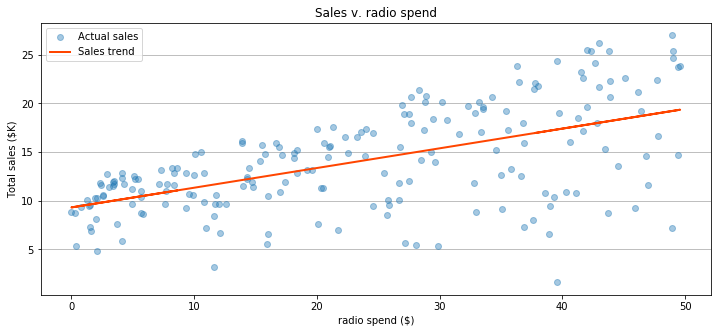

Sales given $0 radio spend: $9311.64 (y-intercept)
Sales per $1 of radio spend: $202.50 (slope)
Strength of fit: 33.20% (R2, adjusted=32.87%)


In [4]:
# now do radio
trendline(df,'radio')

## Channel: Radio
The chart above shows the relationship between advertising spend for radio and total sales. As mentioned earlier, it's critical to note that these results are not necessary causal. You'll use Part 2 of this report to learn the precise contribution of radio spend on total sales.

### Finding: Radio spend varies, but trends higher with total sales
There is a lukewarm correlation of radio spend with total sales. You can see the datapoints grouped somewhat widely along the red line, which increases with spend. The "R-squared" value is 33%, which suggests the line does an OK if not good job of capturing the relationship. 

If we imagine that we vary radio spending, and keep our TV and newspaper spends as they are, each dollar of radio spend could result in something like $202 in increased sales. This is about four times the effect of TV spending. (Again, don't use this figure to make decisions, it's only a rough approximation.)

If we imagine spending nothing on radio, while keeping TV and newspaper at their existing levels, we could estimate total sales at about $9,300, which is about 66% of your average sales.

#### Bottom line: Radio is a solid but variable channel, and we expect it to continue to provide value for your advertising dollars.
  
<br>

  

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 10 May 2018   Prob (F-statistic):            0.00115
Time:                        14:14:15   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

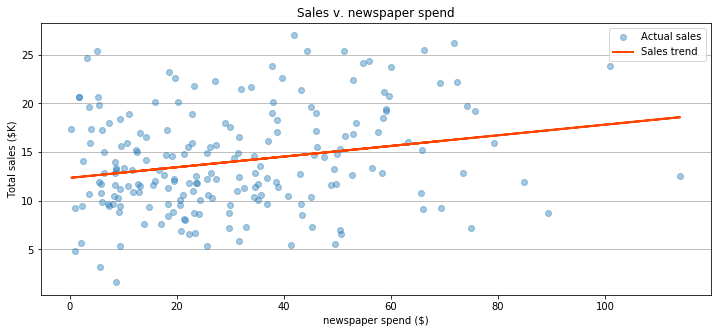

Sales given $0 newspaper spend: $12351.41 (y-intercept)
Sales per $1 of newspaper spend: $54.69 (slope)
Strength of fit: 5.21% (R2, adjusted=4.73%)


In [5]:
# and finally newspaper.
trendline(df,'newspaper')

## Channel: Newspaper
The chart above shows the relationship between advertising spend for newspaper and total sales. As before, it's critical to note that these results are not necessary causal. 

### Finding: Newspaper spend varies widely with total sales with a very weakly discernable pattern
There is a poor correlation of newspaper spend with total sales. You can see the datapoints grouped rather wildly about the red line. The "R-squared" value is 5%, which suggests the line does a poor job of capturing a relationship. We sense that newspaper spend may not have all that much effect on total sales, if at any. We'll use Part 2 to analyze this hypothesis further.

#### Bottom line: Newspaper is a questionable channel when deciding where to put your advertising dollars. 
  
<br>

  

# Part 2 - Channel analysis and recommendations
In this section we cast our analytical eye on each media channel, to explore their contributions towards total sales. We build out a model that describes the performance of your advertising budget on total sales. The resulting statistics will help us recommend the best places to invest your advertising budget.

Note that this section includes much more analytical detail. Your quant shop will probably be most interested in these details. We use them to produce our "Channel investment guide" and "Take aways," which you can find at the end of this section.

## Modeling the effect of advertising spend on total sales
We'll perform linear regression on the three media channels:

* TV
* Radio
* Newspaper



In [6]:
# here we use all three features for our independent variables, and
# create a model predicting sales based on all three at once.

# a dataframe to accumulate results
fields = ['Intercept','TV','radio','newspaper']
stats = pd.DataFrame(columns=['lm','CI low','CI high','p','bootstrap'], 
                     index=fields)

# least squares model
model = sm.ols(formula='sales ~ TV + radio + newspaper', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 10 May 2018   Prob (F-statistic):           1.58e-96
Time:                        14:14:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# tuck away the outcomes for analysis
for o in fields:
    stats.loc[o,'lm']=results.params[o]
    stats.loc[o,'CI low']=results.conf_int().loc[o,0]
    stats.loc[o,'CI high']=results.conf_int().loc[o,1]
    stats.loc[o,'p']=results.pvalues[o]

In [8]:
stats

lm     CI low    CI high            p bootstrap
Intercept     2.93889    2.32376    3.55402  1.26729e-17       NaN
TV          0.0457646  0.0430137  0.0485156  1.50996e-81       NaN
radio         0.18853   0.171547   0.205513  1.50534e-54       NaN
newspaper -0.00103749  -0.012616   0.010541     0.859915       NaN

Check out predicted sales based upon our current investments.

In [9]:
df['sales_predicted'] = results.predict(df)
df.head(4)

TV  radio  newspaper  sales  sales_predicted
1  230.1   37.8       69.2   22.1        20.523974
2   44.5   39.3       45.1   10.4        12.337855
3   17.2   45.9       69.3    9.3        12.307671
4  151.5   41.3       58.5   18.5        17.597830

### Check model assumptions
Let's examine the residuals to verify that the "error" between actual and expected total sales is distributed as expected.

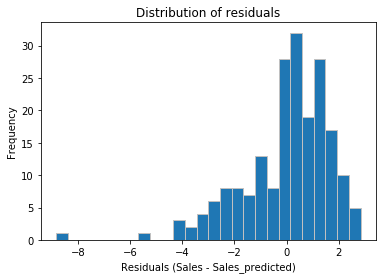

In [10]:
plt.title("Distribution of residuals")
plt.ylabel("Frequency")
plt.xlabel("Residuals (Sales - Sales_predicted)")
_=plt.hist(df.sales-df.sales_predicted,bins=26,edgecolor='silver')

Looks good. The residuals are centered at zero, and are distributed reasonably. This gives us confidence that the model is a good representation of the advertising and sales data.

### Check model performance
Let's look at metrics that indicate how well (or poorly) our model represents reality.

In [11]:
print("R2:",results.rsquared)
print("R2 adjusted:",results.rsquared_adj)

R2: 0.897210638179
R2 adjusted: 0.89563733162


The "R2" value of our model is about 90%, which represents a very good fit of the model to the datapoints. Think of this value ranging from 0-100%, where 100% means a perfect fit. 90% is definitely an "A."

In [12]:
# check the sst, sse and ssr to see whether most of the variance is 
# explained by the model
y_mean = np.mean(df.sales)
sst = np.sum( (df.sales-y_mean)**2 )
ssr = np.sum( (df.sales-df.sales_predicted)**2 )
sse = np.sum( (df.sales_predicted-y_mean)**2 )

print("SST:",sst)
print("SSR:",ssr)
print("SSE:",sse)

print("Mean squared error (MSE):", 1/len(df)*ssr)
print("Root mean squared error (RMSE):", np.sqrt(1/len(df)*ssr))

SST: 5417.148749999998
SSR: 556.8252629021874
SSE: 4860.32348709781
Mean squared error (MSE): 2.7841263145109374
Root mean squared error (RMSE): 1.66857014072


As hoped for, the SSE explains most of SST (SSE/SST = .897), so the model appears to fit the data very well. The root of the mean squared error (RMSE) is about 1.67. For average sales of \$14,000, the average error in our model of about \$1,670 is reasonably small.

### Check influence of a few strong datapoints
Let's have a look at the actual data points themselves, to see if we have any that might be throwing our analysis one way or another.

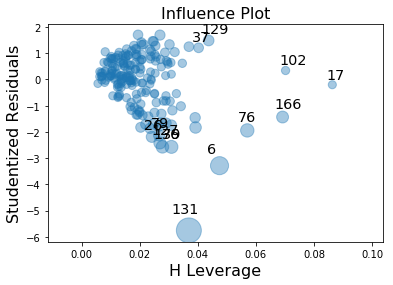

In [13]:
# check out the influence of any outsized datapoints.
import statsmodels.graphics.regressionplots as smg
plt.figure(figsize=(10,6))
_=smg.influence_plot(results,plot_alpha=.4,size=25)

We're not seeing a huge proportion of outsize-influencers. But let's probe this idea to see if reducing the effect of the stronger ones makes any difference. We'll use bootstrap techniques.

In [14]:
# see if we can eliminate the influence of a couple of potentially outsized 
# data points through bootstrap
boot_slopes = {} # e.g., boot_slopes['TV'] is the array of slopes for TV
boot_slopes['TV']=[]
boot_slopes['radio']=[]
boot_slopes['newspaper']=[]
boot_interc = [] # just one array for intercept
n_boots = 500
for _ in range(n_boots):
    # bootstrap sample the original data, with replacement, same size
    sample_df = df.sample(n=len(df), replace=True)
    # fit the linear model
    model_tmp = sm.ols(formula='sales ~ TV + radio + newspaper', data=sample_df)
    results_tmp = model_tmp.fit()
    # accumulate the intercept and slopes
    boot_interc.append(results_tmp.params.Intercept)
    boot_slopes['TV'].append(results_tmp.params.TV)
    boot_slopes['radio'].append(results_tmp.params.radio)
    boot_slopes['newspaper'].append(results_tmp.params.newspaper)
    
stats.loc['Intercept','bootstrap']=np.mean(boot_interc)
for o in ['TV','radio','newspaper']:
    stats.loc[o,'bootstrap']=np.mean(boot_slopes[o])

In [15]:
stats

lm     CI low    CI high            p    bootstrap
Intercept     2.93889    2.32376    3.55402  1.26729e-17      2.93622
TV          0.0457646  0.0430137  0.0485156  1.50996e-81    0.0457697
radio         0.18853   0.171547   0.205513  1.50534e-54     0.188778
newspaper -0.00103749  -0.012616   0.010541     0.859915 -0.000911448

#### Answer: No, we aren't seeing a big effect of outsized datapoints on our results.
The biggest difference of the stronger datapoints on our parameters is only about 1 in 100. We can conclude our model is doing a good job of representing reality.

### Check goodness of fit
A quick look at the p-values for each of the coefficients. This tells us how confident that our coefficients and intercept are believable and accurate.

In [17]:
print("P values:")
print("Intercept:",stats.loc['Intercept','p'])
print("TV coeff:",stats.loc['TV','p'])
print("Radio coeff:",stats.loc['radio','p'])
print("Newspaper coeff:",stats.loc['newspaper','p'])

P values:
Intercept: 1.26729450513e-17
TV coeff: 1.50995995481e-81
Radio coeff: 1.50533892058e-54
Newspaper coeff: 0.859915050081


As anticipated in Part 1, we see very good fits for TV and radio. The p-values for them are vanishingly small, which means that there is no chance for the values to be arrived at by chance. We reject the null hypothesis that these coefficients are zero. This same analysis holds for the intercept, whose p-value is also vanishing small.

For newspaper however we have the opposite story. The coefficient the model predicts is 86% likely to happen through random chance. Therefore, we cannot reject the null hypothesis that the newspaper coefficient is zero. Newspaper spending is not predictive of total sales.

## Channel investment guide
Let's pull our analysis together in a simple chart to help guide Harris Communication's advertising budget. Here is a table showing the three media channels, along with your average spend in each. We also estimate the increase in total sales you'll achieve when investing additional resources in each channel. For example, focus on the TV channel. If you spend an additional \$1 on TV advertising, our model predicts you'll gain about \$46 in total sales. There is a range shown because our model doesn't perfectly fit all the data, and so there's some uncertainly. 

| Channel |  Average spend  | Increase in sales for each \$1 spent | 
|:---|:---:|---|
|  TV | \$147.04  | \$43.01 - \$48.52  | 
| Radio  | \$23.26  | \$171.55 - \$205.51  | 
| Newspaper  | \$30.55  | n/a  |  

### TV and radio
It's very apparent that increasing your advertising budgets in TV and radio will increase sales. You can be 95% confident that adding \$1 in TV advertising will return an additional \$43 to \$48 in sales. For radio that same \$1 investment will return from \$171 to \$205.

### Newspaper
For newspaper advertising, we see a different story. As we predicted in Part 1, newspaper advertising does not appear to have any correlation with total sales. You can increase or decrease the newspaper spend, and your total sales will not respond in any coordinated fashion. That's not to say newspaper advertising is immaterial to sales. It could be that just doing some minimum level of newspaper advertising is enough to get some level of sales. Doing more than the minimum, however, is not recommended.

### Effect of advertising on sales
Finally, we can reach an interesting conclusion regarding the overall effect of advertising. If Harris Communications eliminated practically their entire advertising spends in TV, radio and newspaper channels, you would expect to still achieve total sales of around \$2,300-\$3,500. Comparing this level with your average total sales of \$14,000, we immediately appreciate the importance of your current advertising campaigns. We are pleased to continue to help guide you to increased profitability.

# Take aways
Let's conclude with recommendations on how Harris Communications could adjust its advertising resources, and the effects on sales.

1. **Reduce your newspaper spend to "just enough."** As we learned, there is no correlation between what you spend on newspaper advertising and total sales. We suggest you retain a presence in that media channel, but reduce it from your current average spend of \$30.55.<br><br>

2. **Shift resources from newspaper to radio.** Radio advertising turns out to the have the biggest bang for the buck. Each \$1 you spend on radio should return some \$189 in total sales.<br><br>

3. **Maintain your TV spend.** TV is the most expensive channel to buy. You are currently spending an average of \$147 for TV advertising. It's still an important investment, and every \$1 you spend on TV returns about \$46 in total sales. However radio is an even better investment (see point 2), so available resources should be put towards that channel first. We suggest sticking with your current TV spend, and increasing that if & when you have additional funds to devote to your overall marketing budget.